In [1]:
import numpy as np
import pandas as pd

# データ読み込み

In [2]:
# train_df_temp_for_predictionはland_dataの登記日が2014~2018年→特徴量を限定→欠損除去→販売間隔1日以上→バイナリ変数を作成
train_df_temp_for_prediction = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_train_df_temp_for_prediction.csv")
# test_df_for_predictionを読み込み
test_df_for_prediction = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_test_df_for_prediction.csv")

In [3]:
train_df_temp_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166427 entries, 0 to 166426
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   size                166427 non-null  float64
 1   population_density  166427 non-null  float64
 2   month_sin           166427 non-null  float64
 3   dummy_工業地域          166427 non-null  float64
 4   dummy_工業専用地域        166427 non-null  float64
 5   dummy_準住居地域         166427 non-null  float64
 6   dummy_準工業地域         166427 non-null  float64
 7   dummy_第一種中高層住居専用地域  166427 non-null  float64
 8   dummy_第一種低層住居専用地域   166427 non-null  float64
 9   dummy_第一種住居地域       166427 non-null  float64
 10  dummy_第二種中高層住居専用地域  166427 non-null  float64
 11  dummy_第二種低層住居専用地域   166427 non-null  float64
 12  dummy_第二種住居地域       166427 non-null  float64
 13  dummy_近隣商業地域        166427 non-null  float64
 14  sales1_category     163763 non-null  float64
 15  binary_category     166427 non-nul

In [4]:
test_df_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984132 entries, 0 to 984131
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   size                984132 non-null  float64
 1   population_density  984132 non-null  float64
 2   month_sin           984132 non-null  float64
 3   dummy_工業地域          984132 non-null  float64
 4   dummy_工業専用地域        984132 non-null  float64
 5   dummy_準住居地域         984132 non-null  float64
 6   dummy_準工業地域         984132 non-null  float64
 7   dummy_第一種中高層住居専用地域  984132 non-null  float64
 8   dummy_第一種低層住居専用地域   984132 non-null  float64
 9   dummy_第一種住居地域       984132 non-null  float64
 10  dummy_第二種中高層住居専用地域  984132 non-null  float64
 11  dummy_第二種低層住居専用地域   984132 non-null  float64
 12  dummy_第二種住居地域       984132 non-null  float64
 13  dummy_近隣商業地域        984132 non-null  float64
 14  sales1_category     341187 non-null  float64
 15  binary_category     984132 non-nul

In [6]:
train_df_temp_for_prediction['binary_category'].value_counts()

binary_category
1    137443
0     28984
Name: count, dtype: int64

In [5]:
test_df_for_prediction['binary_category'].value_counts()

binary_category
0    694093
1    290039
Name: count, dtype: int64

# 二値分類実行

## ロジスティック回帰

In [7]:
X_train = train_df_temp_for_prediction.drop(columns=['binary_category', 'sales1_category'])
X_test = test_df_for_prediction.drop(columns=['binary_category', 'sales1_category'])
Y_train = train_df_temp_for_prediction['binary_category']
Y_test = test_df_for_prediction['binary_category']


In [8]:
X_train.head()

,size,population_density,month_sin,dummy_工業地域,dummy_工業専用地域,dummy_準住居地域,dummy_準工業地域,dummy_第一種中高層住居専用地域,dummy_第一種低層住居専用地域,dummy_第一種住居地域,dummy_第二種中高層住居専用地域,dummy_第二種低層住居専用地域,dummy_第二種住居地域,dummy_近隣商業地域
0,-0.204524,-1.960272,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.193918,-1.960272,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.194480,-1.960272,-2.449294e-16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.213822,-1.960272,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.132251,-1.960272,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Accuracy: 0.294715546288506
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    694093
           1       0.29      1.00      0.46    290039

    accuracy                           0.29    984132
   macro avg       0.15      0.50      0.23    984132
weighted avg       0.09      0.29      0.13    984132



d:\fujiwara\M\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\fujiwara\M\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\fujiwara\M\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



==== 混同行列 ====
      予測:0    予測:1
実際:0     0  694093
実際:1     0  290039


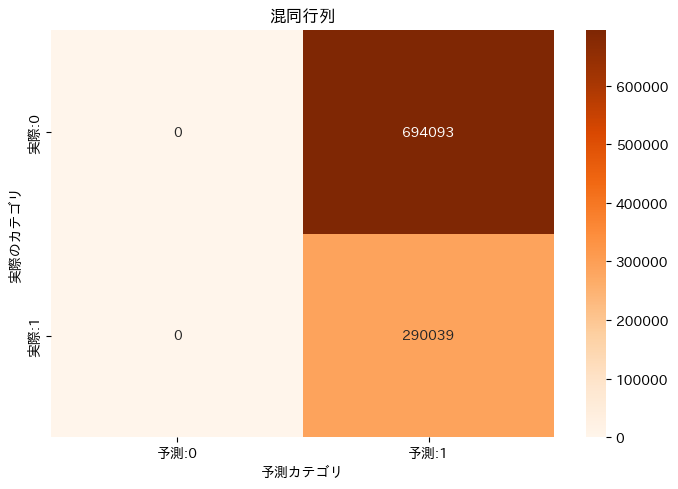

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ロジスティック回帰モデルの定義・学習
model = LogisticRegression()
model.fit(X_train, Y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 精度評価
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# ラベル取得
unique_labels = sorted(list(set(Y_test) | set(y_pred)))  # ユニークなカテゴリの整数値
category_labels = [str(lbl) for lbl in unique_labels]    # 表示用にラベルを文字列化

# 混同行列
cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(
    cm,
    index=[f"実際:{category_labels[i]}" for i in range(len(category_labels))],
    columns=[f"予測:{category_labels[i]}" for i in range(len(category_labels))]
)

# 混同行列の表示
print("\n==== 混同行列 ====")
print(cm_df)

# ヒートマップで可視化
plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


Accuracy: 0.6974674129080245
Confusion Matrix:
 [[583695 110398]
 [187334 102705]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80    694093
           1       0.48      0.35      0.41    290039

    accuracy                           0.70    984132
   macro avg       0.62      0.60      0.60    984132
weighted avg       0.68      0.70      0.68    984132


==== 混同行列 ====
        予測:0    予測:1
実際:0  583695  110398
実際:1  187334  102705


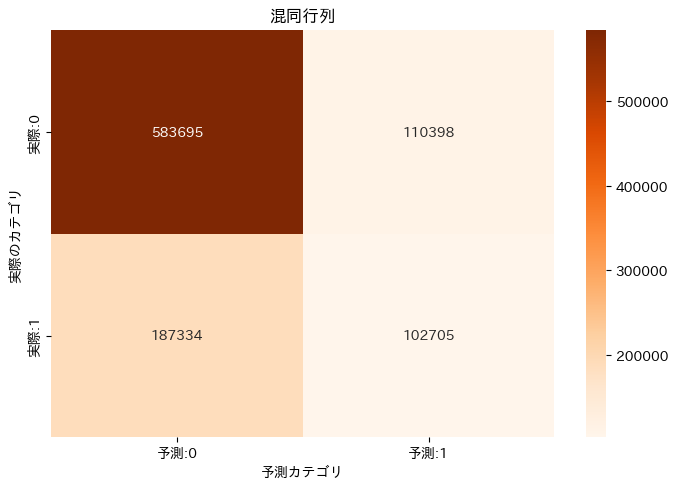

In [12]:
# 不均衡対策あり
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ロジスティック回帰モデルの定義（不均衡データ対応）
model = LogisticRegression(class_weight='balanced', random_state=42)

# モデル学習
model.fit(X_train, Y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 精度評価
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# ラベル取得
unique_labels = sorted(list(set(Y_test) | set(y_pred)))  # ユニークなカテゴリの整数値
category_labels = [str(lbl) for lbl in unique_labels]    # 表示用にラベルを文字列化

# 混同行列
cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(
    cm,
    index=[f"実際:{category_labels[i]}" for i in range(len(category_labels))],
    columns=[f"予測:{category_labels[i]}" for i in range(len(category_labels))]
)

# 混同行列の表示
print("\n==== 混同行列 ====")
print(cm_df)

# ヒートマップで可視化
plt.figure(figsize=(7, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Oranges')
plt.title("混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()



## LightGBM

Accuracy: 0.3111909784459808
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.03      0.06    694093
           1       0.30      0.99      0.46    290039

    accuracy                           0.31    984132
   macro avg       0.57      0.51      0.26    984132
weighted avg       0.68      0.31      0.17    984132


==== 混同行列 ====
       予測:0    予測:1
実際:0  19920  674173
実際:1   3706  286333


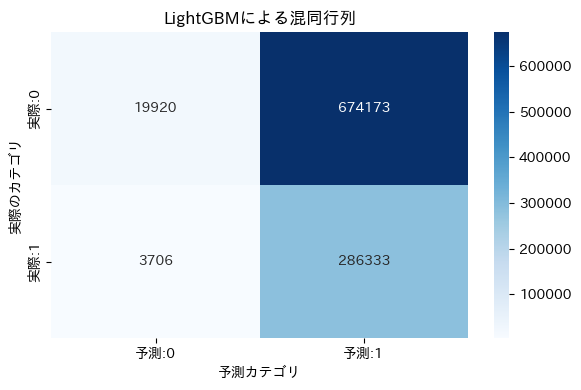

In [14]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# LightGBM のデータセット形式に変換
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

# ハイパーパラメータ設定
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42
}

# モデルの学習
model = lgb.train(params, train_data, num_boost_round=100)

# 予測（確率 → ラベル）
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

# 評価指標出力
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# 混同行列の作成と表示
unique_labels = sorted(list(set(Y_test) | set(y_pred)))
category_labels = [str(lbl) for lbl in unique_labels]

cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(
    cm,
    index=[f"実際:{label}" for label in category_labels],
    columns=[f"予測:{label}" for label in category_labels]
)

print("\n==== 混同行列 ====")
print(cm_df)

# ヒートマップ可視化
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("LightGBMによる混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


Accuracy: 0.5414619177102259
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.47      0.59    694093
           1       0.36      0.71      0.48    290039

    accuracy                           0.54    984132
   macro avg       0.58      0.59      0.53    984132
weighted avg       0.67      0.54      0.56    984132


==== 混同行列 ====
        予測:0    予測:1
実際:0  325954  368139
実際:1   83123  206916


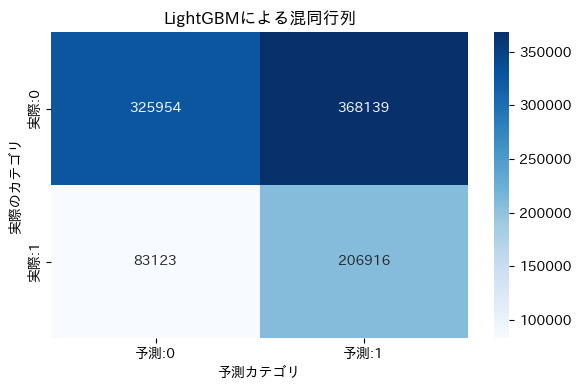

In [15]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# LightGBM のデータセット形式に変換
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

# ハイパーパラメータ設定
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42,
    'is_unbalance': True
}

# モデルの学習
model = lgb.train(params, train_data, num_boost_round=100)

# 予測（確率 → ラベル）
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

# 評価指標出力
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# 混同行列の作成と表示
unique_labels = sorted(list(set(Y_test) | set(y_pred)))
category_labels = [str(lbl) for lbl in unique_labels]

cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(
    cm,
    index=[f"実際:{label}" for label in category_labels],
    columns=[f"予測:{label}" for label in category_labels]
)

print("\n==== 混同行列 ====")
print(cm_df)

# ヒートマップ可視化
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("LightGBMによる混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()


Accuracy: 0.541469030577199
Confusion Matrix:
 [[325961 368132]
 [ 83123 206916]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.47      0.59    694093
           1       0.36      0.71      0.48    290039

    accuracy                           0.54    984132
   macro avg       0.58      0.59      0.53    984132
weighted avg       0.67      0.54      0.56    984132


==== 混同行列 ====
        予測:0    予測:1
実際:0  325961  368132
実際:1   83123  206916


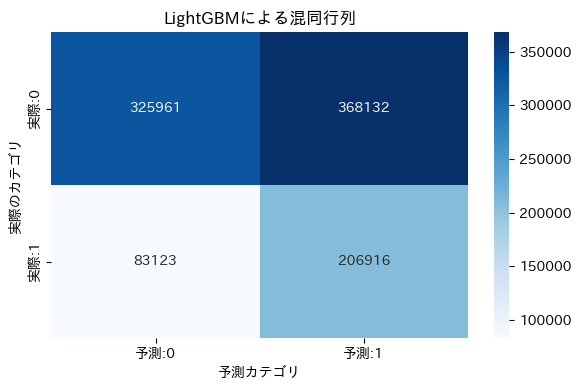

In [16]:
# クラスの比率から重みを計算（例：クラス0が多数、クラス1が少数）
import numpy as np
neg, pos = np.bincount(Y_train)
scale_pos_weight = neg / pos

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42,
    'scale_pos_weight': scale_pos_weight  # 🔴 手動で指定
}
# モデルの学習
model = lgb.train(params, train_data, num_boost_round=100)

# 予測（しきい値0.5で分類）
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int)

# 評価
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# 混同行列の作成と表示
unique_labels = sorted(list(set(Y_test) | set(y_pred)))
category_labels = [str(lbl) for lbl in unique_labels]

cm = confusion_matrix(Y_test, y_pred, labels=unique_labels)
cm_df = pd.DataFrame(
    cm,
    index=[f"実際:{label}" for label in category_labels],
    columns=[f"予測:{label}" for label in category_labels]
)

print("\n==== 混同行列 ====")
print(cm_df)

# ヒートマップ可視化
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("LightGBMによる混同行列")
plt.xlabel("予測カテゴリ")
plt.ylabel("実際のカテゴリ")
plt.tight_layout()
plt.show()
